In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read parquet
df_occ = pd.read_parquet("data/occupancy.parquet")
df_ts = pd.read_parquet("data/timeseries.parquet")

In [2]:
### Preview of dataframe to see what we are working with
df_occ

,organization_id,state,city,building_name,space_name,space_type,space_description,capacity,date_time,date_daily,people_in,people_out,traffic,occupancy
0,63f4d9f01ae6380cd40791EY,Ontario,Toronto,Building_1,Space1_Building_1,Building,Main Entrance,800,2023-03-05 00:00:00,2023-03-05,0.0,0.0,0.0,0.0
1,63f4d9f01ae6380cd40791EY,Ontario,Toronto,Building_10,Space1_Building_10,Tower,Main Entrance,475,2023-03-05 00:00:00,2023-03-05,0.0,2.0,2.0,2.0
2,63f4d9f01ae6380cd40791EY,Alberta,Edmonton,Building_11,Space1_Building_11,Tower,Main Entrance,590,2023-03-05 00:00:00,2023-03-05,7.0,8.0,15.0,2.0
3,63f4d9f01ae6380cd40791EY,British Columbia,Vancouver,Building_12,Space1_Building_12,Tower,Main Entrance,580,2023-03-05 00:00:00,2023-03-05,3.0,2.0,5.0,5.0
4,63f4d9f01ae6380cd40791EY,Ontario,Toronto,Building_13,Space1_Building_13,Tower,Main Entrance,900,2023-03-05 00:00:00,2023-03-05,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10228,63f4d9f01ae6380cd40791EY,Michigan,Detroit,Building_41,Space1_Building_41,Building,Main Entrance,435,2023-03-11 19:00:00,2023-03-11,0.0,0.0,0.0,1.0
10229,63f4d9f01ae6380cd40791EY,Alberta,Edmonton,Building_5,Space2_Building_5,Tower,Main Entrance,1218,2023-03-11 19:00:00,2023-03-11,0.0,0.0,0.0,1.0
10230,63f4d9f01ae6380cd40791EY,Alberta,Edmonton,Building_5,Space1_Building_5,Building,Main Entrance,1218,2023-03-11 19:00:00,2023-03-11,0.0,3.0,3.0,0.0
10231,63f4d9f01ae6380cd40791EY,British Columbia,Vancouver,Building_6,Space1_Building_6,Building,Main Entrance,1322,2023-03-11 19:00:00,2023-03-11,3.0,7.0,10.0,3.0


In [3]:
print(df_occ["space_description"].unique())
print(df_occ["space_type"].unique())

['Main Entrance']
['Building' 'Tower' 'Retail']


In [4]:
# Listing all the unique cities, states
cities = df_occ["city"].unique()
states = df_occ["state"].unique()
print(cities,"\n",states)

['Toronto' 'Edmonton' 'Vancouver' 'Detroit'] 
 ['Ontario' 'Alberta' 'British Columbia' 'Michigan']


In [5]:
# Look at any unique values of a column 
uniques = df_occ["space_description"].unique()
buildings = df_occ["building_name"].unique()
print(uniques,"\n",buildings,"\n",buildings.size)

['Main Entrance'] 
 ['Building_1' 'Building_10' 'Building_11' 'Building_12' 'Building_13'
 'Building_14' 'Building_15' 'Building_16' 'Building_17' 'Building_18'
 'Building_19' 'Building_2' 'Building_20' 'Building_21' 'Building_22'
 'Building_23' 'Building_24' 'Building_25' 'Building_26' 'Building_27'
 'Building_28' 'Building_29' 'Building_3' 'Building_30' 'Building_31'
 'Building_32' 'Building_33' 'Building_34' 'Building_35' 'Building_36'
 'Building_37' 'Building_38' 'Building_39' 'Building_4' 'Building_40'
 'Building_41' 'Building_5' 'Building_6' 'Building_7' 'Building_8'
 'Building_9'] 
 41


In [6]:
# How many spaces there are per building
num_spaces_list = []
for name in buildings:
    df = df_occ[(df_occ["building_name"] == name)].reset_index(drop=True)
    spaces = df["space_name"].unique()
    num_spaces_list.append(spaces.size)
num_spaces = np.array(num_spaces_list).astype(int) 
print(num_spaces)
# We see most of 1, but many have 2 or 3.

[1 1 1 1 1 1 1 1 1 1 2 1 3 3 3 3 3 2 1 1 1 1 1 2 2 2 1 1 2 2 1 2 1 1 1 1 2
 2 1 2 2]


In [7]:
# Looking at one full 24 hour period

df_fil = df_occ[(df_occ["building_name"] == buildings[0])].reset_index(drop=True)
np.sum(np.array(df_fil.iloc[49:75]["people_in"]).astype(float)) #- df_fil.iloc[49:75]["people_out"]

np.float64(981.0)

In [8]:
np.sum(np.array(df_fil.iloc[49:75]["people_out"]).astype(float))

np.float64(866.0)

In [9]:
df_fil.iloc[0:25]

,organization_id,state,city,building_name,space_name,space_type,space_description,capacity,date_time,date_daily,people_in,people_out,traffic,occupancy
0,63f4d9f01ae6380cd40791EY,Ontario,Toronto,Building_1,Space1_Building_1,Building,Main Entrance,800,2023-03-05 00:00:00,2023-03-05,0.0,0.0,0.0,0.0
1,63f4d9f01ae6380cd40791EY,Ontario,Toronto,Building_1,Space1_Building_1,Building,Main Entrance,800,2023-03-05 01:00:00,2023-03-05,0.0,1.0,1.0,0.0
2,63f4d9f01ae6380cd40791EY,Ontario,Toronto,Building_1,Space1_Building_1,Building,Main Entrance,800,2023-03-05 02:00:00,2023-03-05,0.0,0.0,0.0,0.0
3,63f4d9f01ae6380cd40791EY,Ontario,Toronto,Building_1,Space1_Building_1,Building,Main Entrance,800,2023-03-05 03:00:00,2023-03-05,0.0,0.0,0.0,0.0
4,63f4d9f01ae6380cd40791EY,Ontario,Toronto,Building_1,Space1_Building_1,Building,Main Entrance,800,2023-03-05 04:00:00,2023-03-05,1.0,1.0,2.0,1.0
5,63f4d9f01ae6380cd40791EY,Ontario,Toronto,Building_1,Space1_Building_1,Building,Main Entrance,800,2023-03-05 05:00:00,2023-03-05,0.0,0.0,0.0,0.0
6,63f4d9f01ae6380cd40791EY,Ontario,Toronto,Building_1,Space1_Building_1,Building,Main Entrance,800,2023-03-05 06:00:00,2023-03-05,1.0,2.0,3.0,0.0
7,63f4d9f01ae6380cd40791EY,Ontario,Toronto,Building_1,Space1_Building_1,Building,Main Entrance,800,2023-03-05 07:00:00,2023-03-05,0.0,0.0,0.0,0.0
8,63f4d9f01ae6380cd40791EY,Ontario,Toronto,Building_1,Space1_Building_1,Building,Main Entrance,800,2023-03-05 08:00:00,2023-03-05,0.0,0.0,0.0,0.0
9,63f4d9f01ae6380cd40791EY,Ontario,Toronto,Building_1,Space1_Building_1,Building,Main Entrance,800,2023-03-05 09:00:00,2023-03-05,2.0,0.0,2.0,2.0


It appears occuoancy resets at 02:00 everyday. 

In [10]:
# This function keeps a running total, but if total goes below zero, then likely sensor error so just correct to 0
# This fixes an issue I had where my flow occ would be stuck in a whole and miss too many people 
# Because of Date Daily sort by, this resets to zero every midnight
def running_occ(flow):
    occ = []
    total = 0
    for f in flow:
        total += f
        if total < 0:
            total = 0
        occ.append(total)
    return occ

#df_fil["flow_occ"] = df_fil.groupby(group_cols)["flow"].transform(running_occ)

Flow-derived and measured occupancy track each other closely, with deviations of only a few people even when counts are in the hundreds. Given this scale, small differences are unlikely to be operationally meaningful.

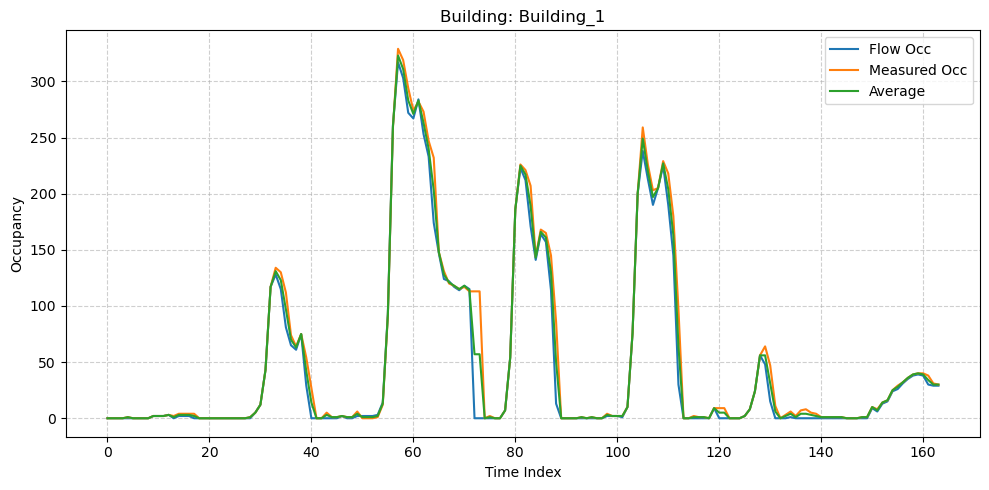

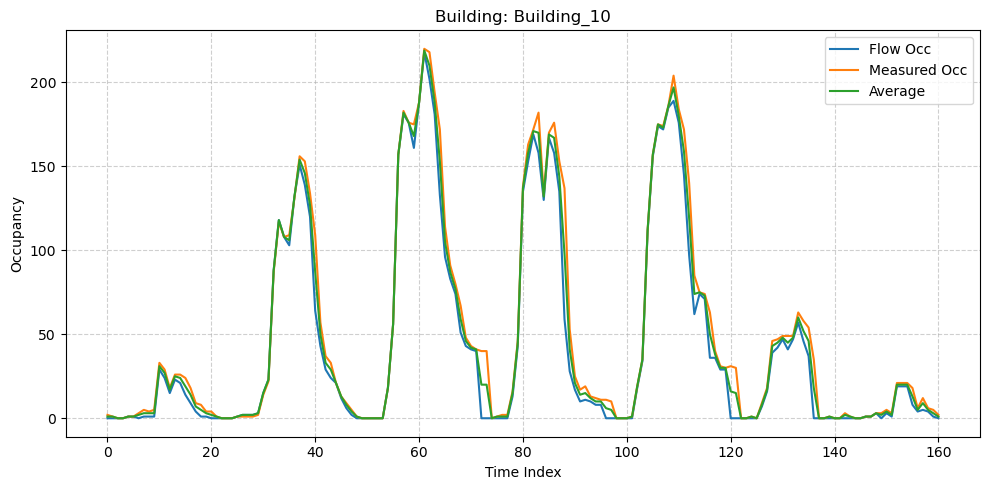

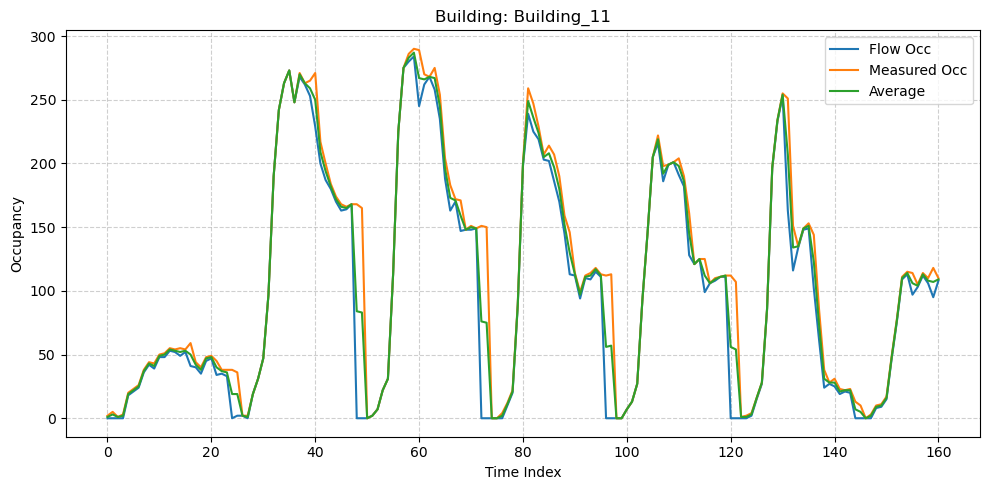

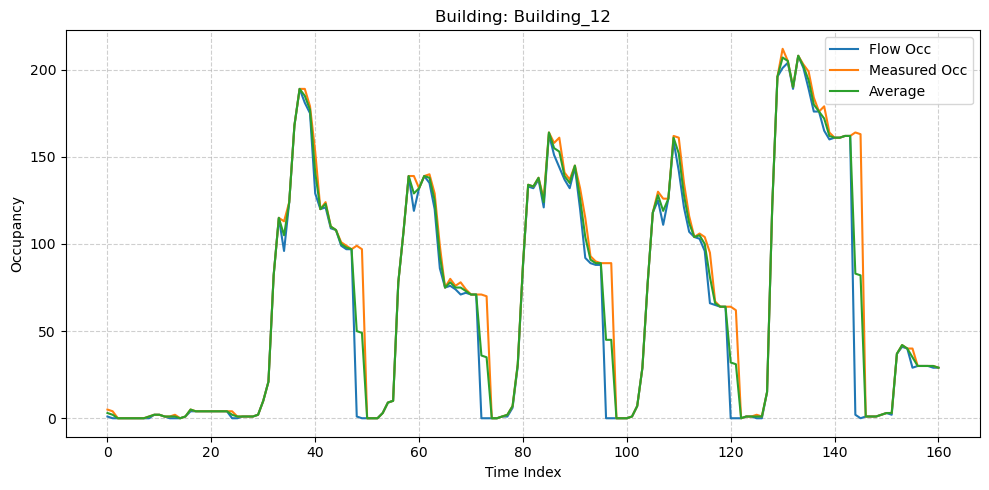

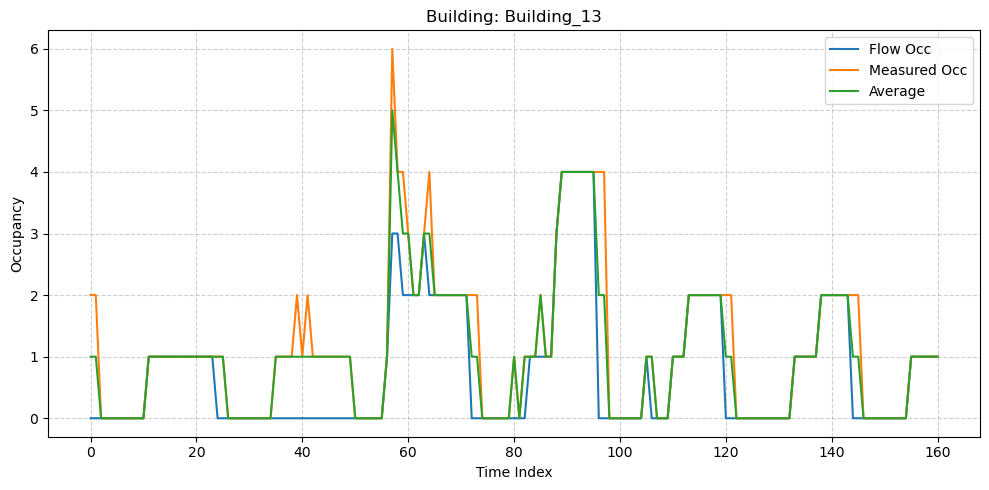

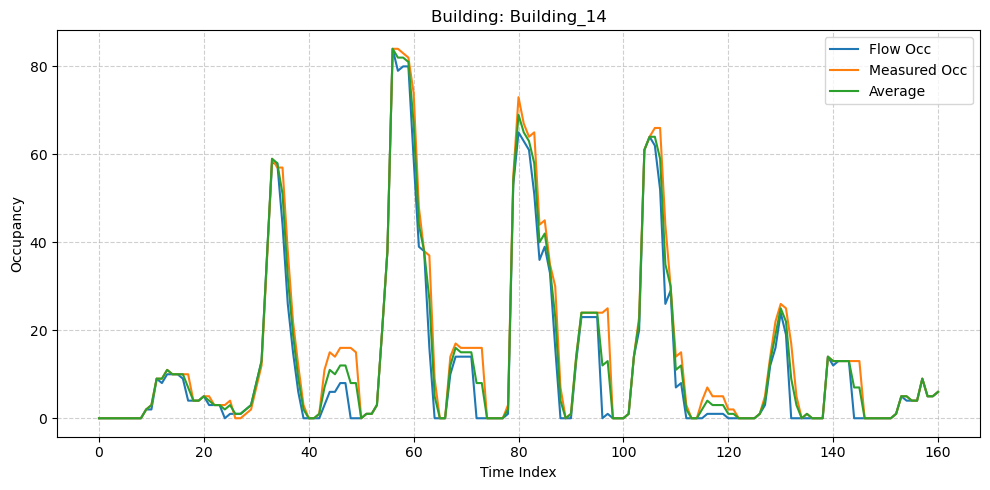

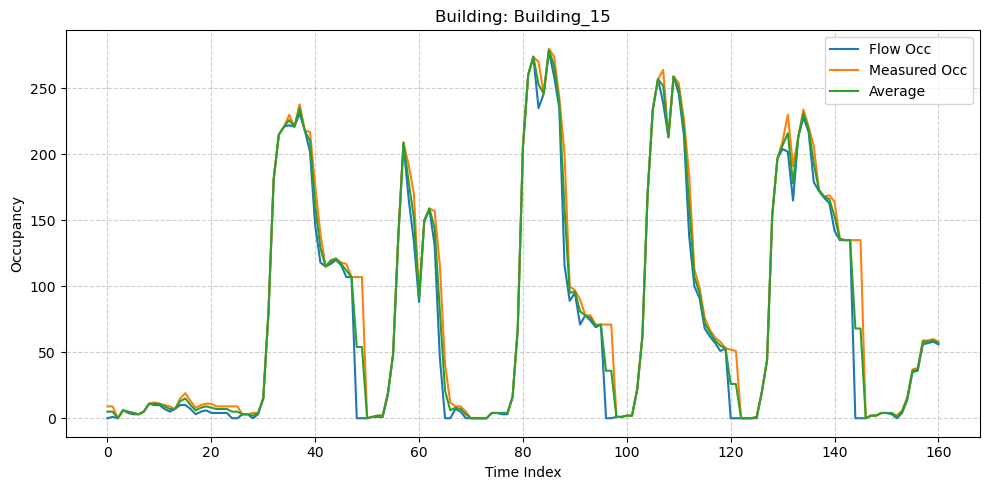

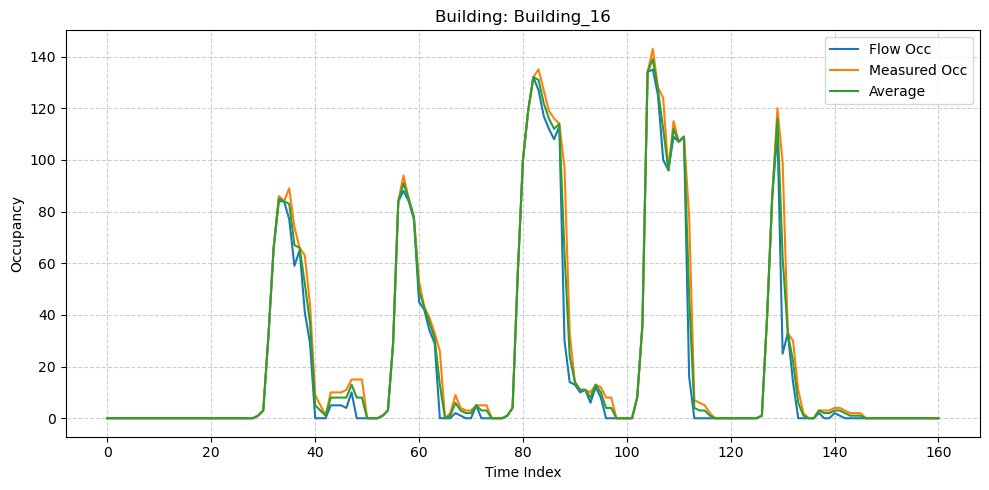

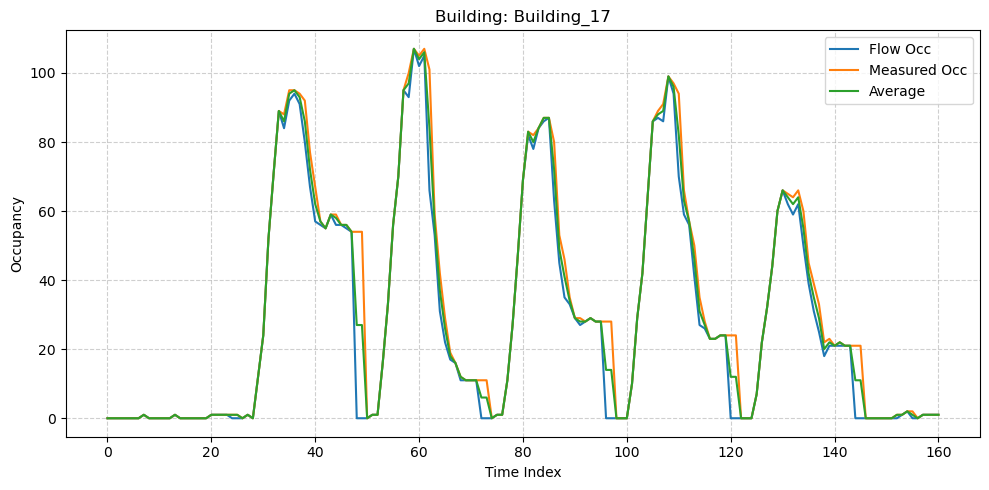

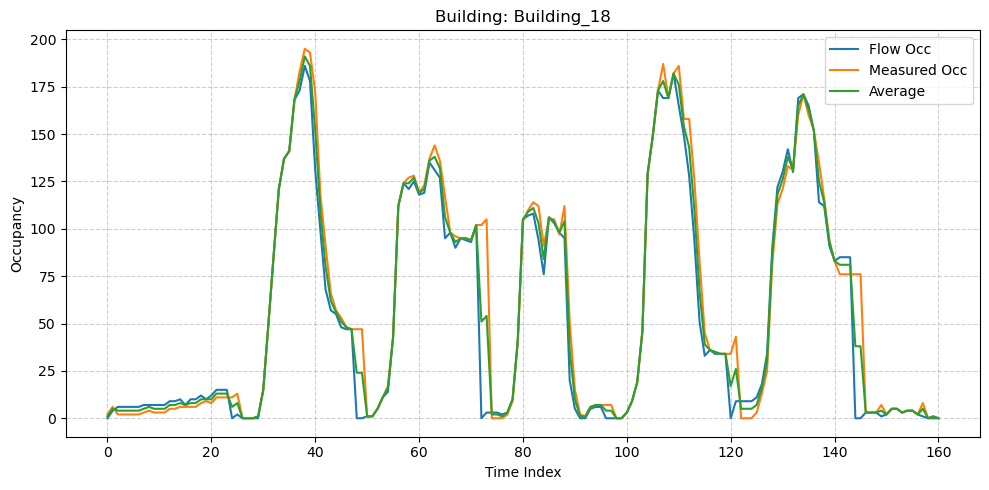

In [12]:
# Plots first 10 and computes a rounded average between the flow_occ and measured_occ. Rounding up favors not missing a person in case there's important anamolies to detect.
group_cols = ["organization_id", "building_name", "space_name", "date_daily"]

# Grab first 10 buildings
buildings = df_occ["building_name"].unique()[:10]

for b in buildings:
    df_fil = df_occ[df_occ["building_name"] == b].reset_index(drop=True)

    # Compute flow and flow-based occupancy
    df_fil["flow"] = df_fil["people_in"].fillna(0) - df_fil["people_out"].fillna(0)
    df_fil["flow_occ"] = df_fil.groupby(group_cols)["flow"].transform(running_occ)
    #df_fil["avg_occ"] = (df_fil["flow_occ"] + df_fil["occupancy"]) / 2

    occ = np.array(df_fil["flow_occ"]).astype(float)
    measured_occ = np.array(df_fil["occupancy"]).astype(float)
    x = np.arange(occ.size)

    # Plot
    plt.figure(figsize=(10,5))
    plt.plot(x, occ, label="Flow Occ")
    plt.plot(x, measured_occ, label="Measured Occ")
    plt.plot(x,np.ceil((measured_occ+occ)/2).astype(int),label="Average")
    plt.title(f"Building: {b}")
    plt.xlabel("Time Index")
    plt.ylabel("Occupancy")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


These track much more closley than just adding the flow. This lead to being in a negative hole that we had to climb out of, and lead to big discrpancies between the two plots.

In [13]:
# Let's look at the whole data frame to see if this simple fix worked
group_cols = ["organization_id","state","city", "building_name", "space_name", "date_daily"]

df_test = df_occ.copy()
df_test["flow"] = df_test["people_in"].fillna(0) - df_test["people_out"].fillna(0)
df_test["flow_occ"] = df_test.groupby(group_cols)["flow"].transform(running_occ)
df_test["avg_occ"] = (df_test["flow_occ"] + df_test["occupancy"]) / 2
#df_test

In [14]:
# Checking random location to see if it gave reasonable results
df_small = df_test[(df_test["space_name"] == "Space1_Building_41") & (df_test["building_name"] == "Building_41") & (df_test["city"] == "Detroit")].copy().reset_index(drop=True)
df_small

,organization_id,state,city,building_name,space_name,space_type,space_description,capacity,date_time,date_daily,people_in,people_out,traffic,occupancy,flow,flow_occ,avg_occ
0,63f4d9f01ae6380cd40791EY,Michigan,Detroit,Building_41,Space1_Building_41,Building,Main Entrance,435,2023-03-05 00:00:00,2023-03-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,63f4d9f01ae6380cd40791EY,Michigan,Detroit,Building_41,Space1_Building_41,Building,Main Entrance,435,2023-03-05 01:00:00,2023-03-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,63f4d9f01ae6380cd40791EY,Michigan,Detroit,Building_41,Space1_Building_41,Building,Main Entrance,435,2023-03-05 02:00:00,2023-03-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,63f4d9f01ae6380cd40791EY,Michigan,Detroit,Building_41,Space1_Building_41,Building,Main Entrance,435,2023-03-05 03:00:00,2023-03-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,63f4d9f01ae6380cd40791EY,Michigan,Detroit,Building_41,Space1_Building_41,Building,Main Entrance,435,2023-03-05 04:00:00,2023-03-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,63f4d9f01ae6380cd40791EY,Michigan,Detroit,Building_41,Space1_Building_41,Building,Main Entrance,435,2023-03-11 15:00:00,2023-03-11,0.0,0.0,0.0,1.0,0.0,1.0,1.0
160,63f4d9f01ae6380cd40791EY,Michigan,Detroit,Building_41,Space1_Building_41,Building,Main Entrance,435,2023-03-11 16:00:00,2023-03-11,0.0,0.0,0.0,1.0,0.0,1.0,1.0
161,63f4d9f01ae6380cd40791EY,Michigan,Detroit,Building_41,Space1_Building_41,Building,Main Entrance,435,2023-03-11 17:00:00,2023-03-11,0.0,0.0,0.0,1.0,0.0,1.0,1.0
162,63f4d9f01ae6380cd40791EY,Michigan,Detroit,Building_41,Space1_Building_41,Building,Main Entrance,435,2023-03-11 18:00:00,2023-03-11,0.0,0.0,0.0,1.0,0.0,1.0,1.0


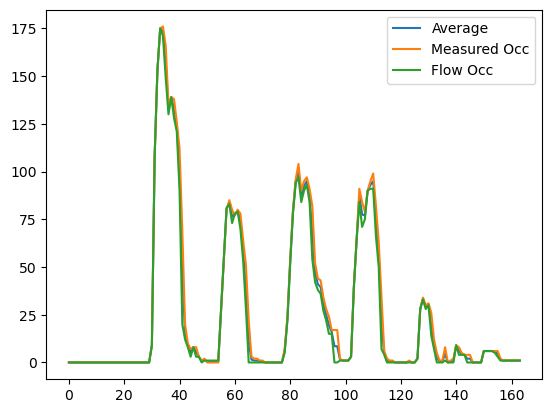

In [15]:
# Sanity check
avg = np.array(df_small["avg_occ"]).astype(float)
m_occ = np.array(df_small["occupancy"]).astype(float)
f_occ = np.array(df_small["flow_occ"]).astype(float)
x = np.arange(avg.size)
plt.plot(x,avg,label = "Average")
plt.plot(x,m_occ,label="Measured Occ")
plt.plot(x,f_occ,label="Flow Occ")
plt.legend()
plt.show()